- - - -
# Mechpy Tutorials
a mechanical engineering toolbox

source code - https://github.com/nagordon/mechpy  
documentation - https://nagordon.github.io/mechpy/web/  

- - - -

## Curve Fitting with python

In [45]:
# import modules
from numpy import *
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import fmin
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,8)
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

(0, 12)

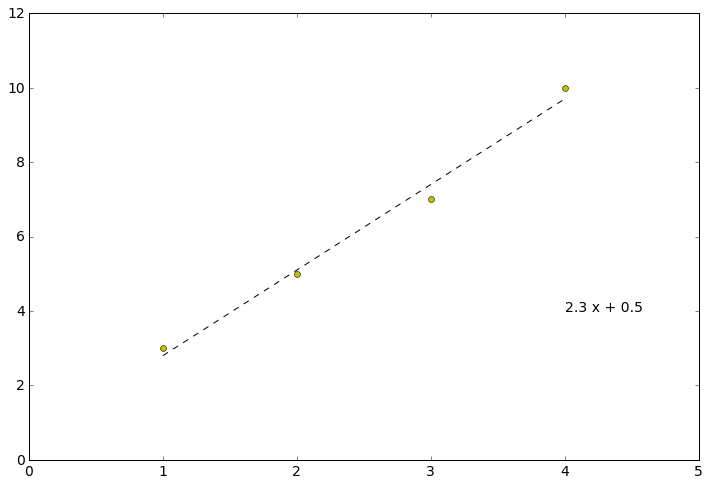

In [46]:
#==============================================================================
# Method 1 - polyfit
#==============================================================================
x = [1,2,3,4]
y = [3,5,7,10] # 10, not 9, so the fit isn't perfect
fit = polyfit(x,y,1)
fit_fn = poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y
plt.text(4,4,fit_fn)
plt.plot(x,y, 'yo', x, fit_fn(x), '--k')
plt.xlim(0, 5)
plt.ylim(0, 12)

         3          2
0.08704 x - 0.8135 x + 1.693 x - 0.03968
 ------------------------------------------ 
           5         4         3         2
-0.008333 x + 0.125 x - 0.575 x + 0.625 x + 0.6333 x - 1.886e-14


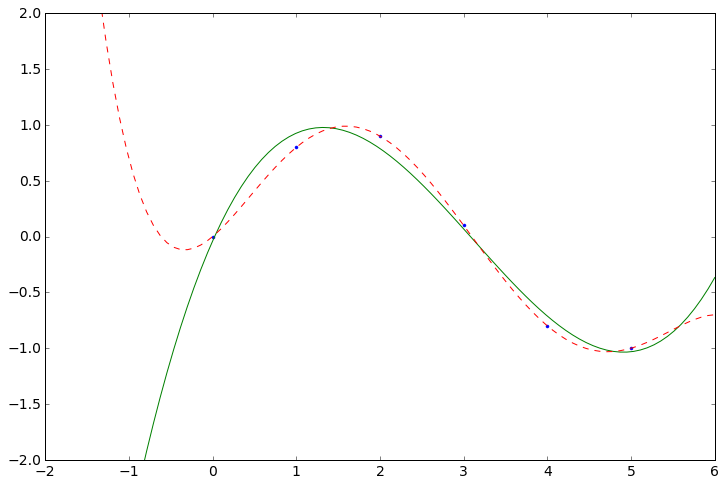

In [47]:
x = array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
z = polyfit(x, y, 3)

p = poly1d(z)
print(p)

p6 = poly1d(polyfit(x, y, 5))
print(' ------------------------------------------ ')
print(p6)

xp = linspace(-2, 6, 100)
plt.plot(x, y, '.', xp, p(xp), '-', xp, p6(xp), '--')
plt.ylim(-2,2)

plt.show()

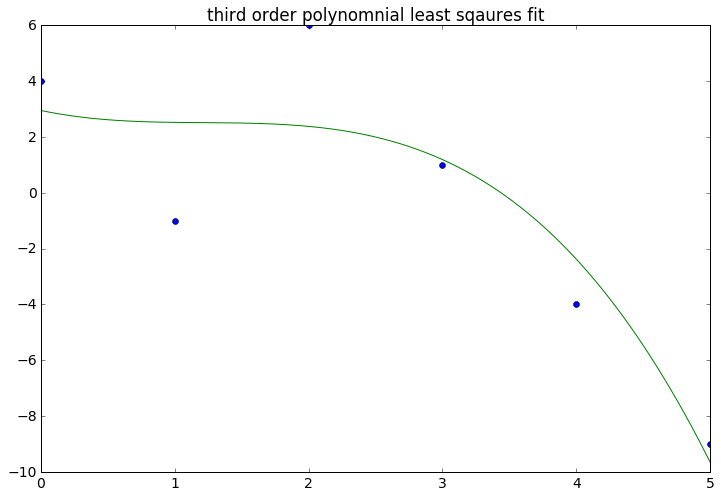

In [48]:
#==============================================================================
# Hmk from numerical methods class
#==============================================================================
X = array([0,  1, 2, 3,  4,  5])
Y = array([4, -1, 6, 1, -4, -9])
order=3 # integer > 0
C = polyfit(X,Y,order);
C = flipud(C)

h = 1000
xfit = linspace(min(X),max(X),h);
yfit = zeros(len(xfit))

for i,c in enumerate(C):
    yfit += c*xfit**i

plt.plot(X,Y,'o',xfit,yfit)
plt.title('third order polynomnial least sqaures fit')
plt.show()

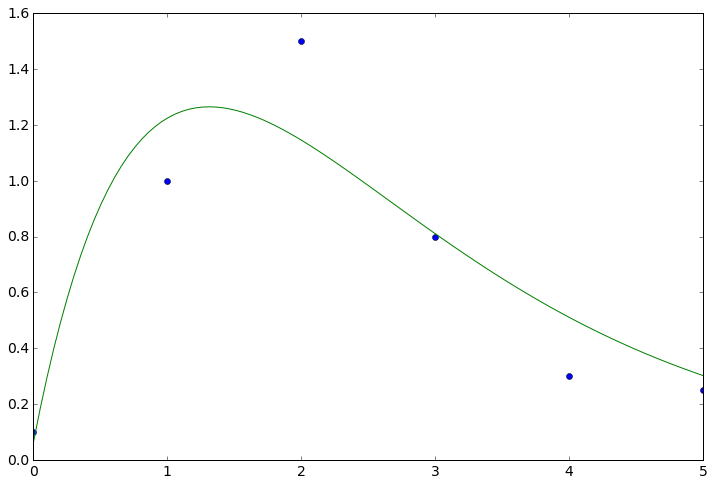

In [49]:
#==============================================================================
# non-linear least squares
#==============================================================================
x = arange(-pi,pi, 0.01)
y = sin(x)*exp(-x)

X = array([0 ,   1 , 2 ,   3 ,   4 ,   5 ])
Y = array([0.1,  1 , 1.5 , 0.8 , 0.3 , 0.25 ])

fn = lambda a: (a[0]*X+a[1]) * exp(a[2]*X+a[3])
Sn = lambda x: sum( (fn(x)-Y)**2 )
A = fmin(func=Sn, x0=[0,0,0,0])

plt.plot(X, Y,'o')
xplot = linspace(0,5,100)
fnfit = lambda x,a: (a[0]*x+a[1]) * exp(a[2]*x+a[3])
plt.plot(xplot, fnfit(xplot, A))

Optimization terminated successfully.
         Current function value: 0.015158
         Iterations: 109
         Function evaluations: 208
[ 0.49404038  3.96935945]


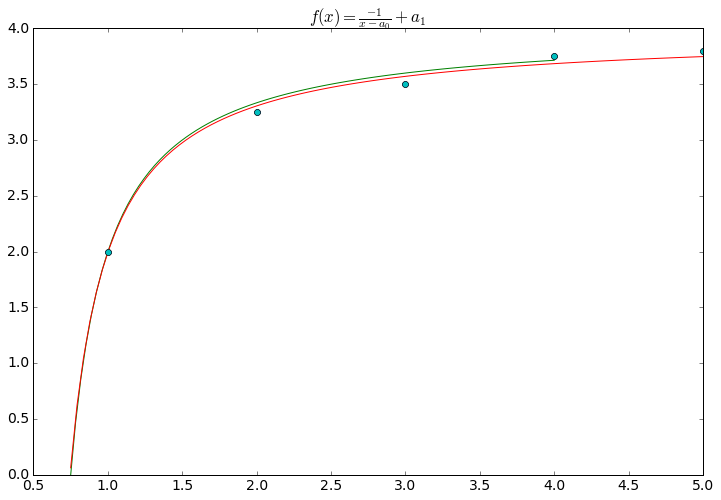

In [52]:


X = array([1, 2,    3,   4 ,    5 ])
Y = array([2, 3.25, 3.5, 3.75 , 3.8])

# a[0] is the x asymptote and a[1] is the y asymptote and 
fn = lambda a: -1/(X-a[0]) + a[1]
Sn = lambda x: sum( (fn(x)-Y)**2 )

A = fmin(func=Sn, x0=[0,0])
print(A)
plt.plot(X, Y,'o')
xplot = linspace(0.75 , 5,100)
fnfit = lambda x,a: -1/(x-a[0]) + a[1]

eps = 1e-16
xp = 0.5
yp = 4
x = np.linspace(xp,4,100)
y = -1/(x-xp+eps)+yp
plt.plot(x,y)
plt.ylim([0,yp])
plt.title('plot of how the function should look with actual parameters')

plt.plot(xplot, fnfit(xplot, A))
plt.plot(X,Y, 'o')
plt.title(r'$f(x)=\frac{-1}{x-a_0}+a_1$')
#plt.text(2,1,r'$f(x)=\frac{-1}{x-0.494}+3.969$')